In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load the CSV files using pandas
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')


In [3]:
# Assuming the first column contains the labels and the remaining columns are the pixel values
# Extract features (pixel values) and labels
X_train = train_data.iloc[:, 1:].values  # All columns except the first (image pixels)
y_train = train_data.iloc[:, 0].values   # The first column is the label

X_test = test_data.iloc[:, 1:].values    # All columns except the first (image pixels)
y_test = test_data.iloc[:, 0].values     # The first column is the label

In [4]:
# Reshape the image data into (num_samples, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))


In [5]:
# Normalize pixel values to the range (0, 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [6]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Create the CNN model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps before fully connected layers
model.add(layers.Flatten())

# Dense (fully connected) layer
model.add(layers.Dense(128, activation='relu'))

# Output layer (10 classes)
model.add(layers.Dense(10, activation='softmax'))

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7632 - loss: 0.6484 - val_accuracy: 0.8737 - val_loss: 0.3543
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8807 - loss: 0.3336 - val_accuracy: 0.8933 - val_loss: 0.3011
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9019 - loss: 0.2680 - val_accuracy: 0.9018 - val_loss: 0.2746
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9137 - loss: 0.2346 - val_accuracy: 0.9103 - val_loss: 0.2579
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9259 - loss: 0.2019 - val_accuracy: 0.9097 - val_loss: 0.2570
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9334 - loss: 0.1786 - val_accuracy: 0.9103 - val_loss: 0.2559
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9419 - loss: 0.1576 - val_accuracy: 0.9092 - val_loss: 0.2735
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9494 -

In [9]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9063 - loss: 0.3062
Test accuracy: 0.9125000238418579


In [10]:
# Make predictions on test data
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [11]:
# Convert prediction probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to class labels
true_classes = np.argmax(y_test, axis=1)

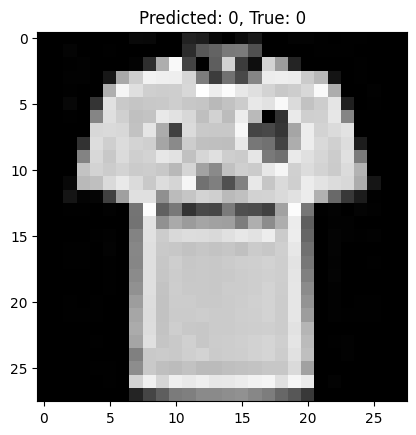

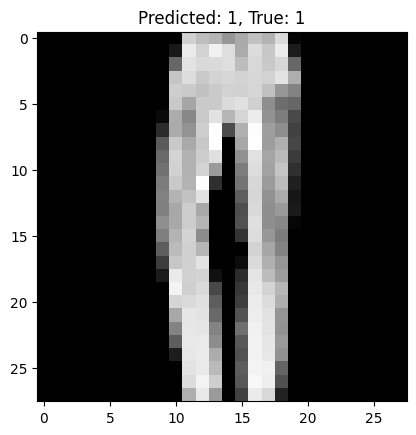

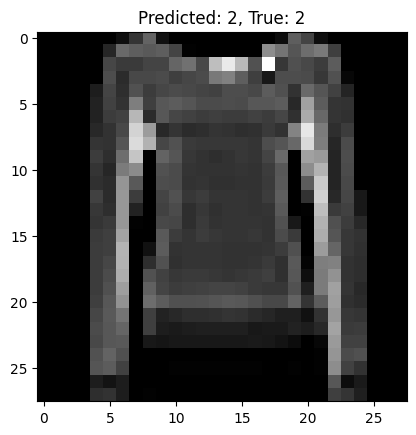

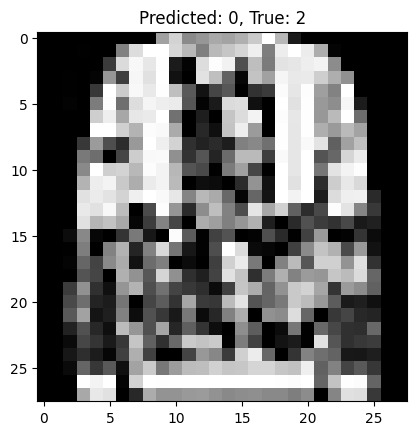

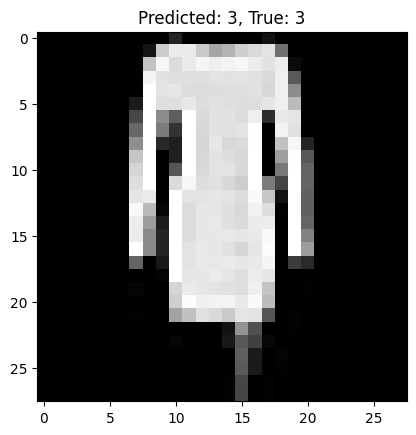

In [12]:
# Function to plot images and predictions
def plot_predictions(index):
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[index]}, True: {true_classes[index]}")
    plt.show()

# Show predictions for the first 5 images
for i in range(5):
    plot_predictions(i)
